In [2]:
import pandas as pd
import os

# 1. 读取 Excel 文件
df = pd.read_excel("Data_Set_C.xlsx")

# 2. 按 "表面类型" 列降序排序（若需升序改为 ascending=True）
df_sorted = df.sort_values(by="Type", ascending=False)



# 4. 保存为 CSV 文件

df_sorted.to_csv("Data_Set_C_sorted.csv", index=False)  # 直接保存到当前目录

print("文件已保存至：../data/Data_Set_C_sorted.csv")

文件已保存至：../data/Data_Set_C_sorted.csv


✅ Accuracy on Test Set C (Type=5): 0.9138
✅ F1-score on Test Set C (Type=5): 0.8


c:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


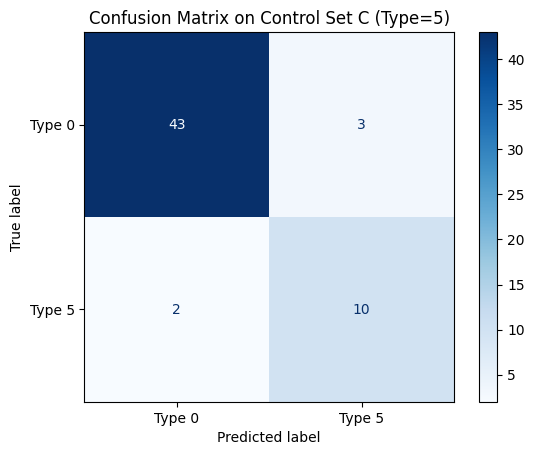

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import ADASYN  # 用于平衡训练集

# --------------------------------
# 📂 2. 加载测试集 C（Data_Set_C_sorted.csv）
# --------------------------------
df_test = pd.read_csv("Data_Set_C_sorted.csv")
X_test = df_test.drop(columns=["Type"])  # 假设测试集包含 "Type" 列
y_test = (df_test["Type"] == 5).astype(int)  # 将 Type=5 转为二分类目标

# --------------------------------
# 📂 3. 加载完整训练集（sorted_data.csv）
# --------------------------------
df_train = pd.read_csv("sorted_data.csv")
X_train = df_train.drop(columns=["Type"])  # 假设训练集包含 "Type" 列
y_train = (df_train["Type"] == 5).astype(int)  # 将 Type=5 转为二分类目标

# --------------------------------
# 🔄 4. 特征归一化（保持一致性）
# --------------------------------
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # 注意使用相同 scaler

# --------------------------------
# ⚖️ 5. 用 ADASYN 平衡训练集
# --------------------------------
adasyn = ADASYN(random_state=42)
X_train_bal, y_train_bal = adasyn.fit_resample(X_train_scaled, y_train)

# --------------------------------
# 🧠 6. 构建并训练最佳模型
# --------------------------------
model = MLPClassifier(
    hidden_layer_sizes=(100, 50, 25, 10),  # 可根据需要调整
    activation='relu',
    solver='lbfgs',
    max_iter=500,
    random_state=42
)
model.fit(X_train_bal, y_train_bal)

# --------------------------------
# 📈 7. 在 C 集上评估
# --------------------------------
y_pred = model.predict(X_test_scaled)

f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("✅ Accuracy on Test Set C (Type=5):", round(acc, 4))
print("✅ F1-score on Test Set C (Type=5):", round(f1, 4))

# --------------------------------
# 📊 8. 混淆矩阵图
# --------------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Type 0", "Type 5"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Control Set C (Type=5)")
plt.show()

✅ Accuracy on Test Set C (Type=5): 0.8966
✅ F1-score on Test Set C (Type=5): 0.75


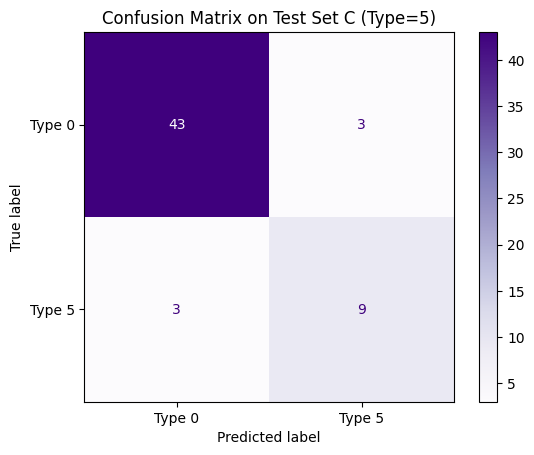

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE  # 使用 SMOTE 平衡数据

# --------------------------------
# 📦 1. 加载测试集 C（Data_Set_C_sorted.csv）
# --------------------------------
df_test = pd.read_csv("Data_Set_C_sorted.csv")
X_test = df_test.drop(columns=["Type"])  # 假设测试集包含 "Type" 列
y_test = (df_test["Type"] == 5).astype(int)  # 将 Type=5 转为二分类目标

# --------------------------------
# 📂 2. 加载训练集（sorted_data.csv）
# --------------------------------
df_train = pd.read_csv("sorted_data.csv")
X_train = df_train.drop(columns=["Type"])  # 假设训练集包含 "Type" 列
y_train = (df_train["Type"] == 5).astype(int)  # 将 Type=5 转为二分类目标

# --------------------------------
# 🔄 3. 特征归一化（保持一致性）
# --------------------------------
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # 注意使用相同 scaler

# --------------------------------
# ⚖️ 4. 使用 SMOTE 平衡训练数据
# --------------------------------
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# --------------------------------
# 🧠 5. 定义并训练最佳模型
# --------------------------------
model = MLPClassifier(
    hidden_layer_sizes=(64, 32), # 可根据需要调整
    activation='tanh',
    solver='lbfgs',
    max_iter=500,
    random_state=42
)
model.fit(X_train_bal, y_train_bal)

# --------------------------------
# 📈 6. 在测试集 C 上进行预测
# --------------------------------
y_pred = model.predict(X_test_scaled)

f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("✅ Accuracy on Test Set C (Type=5):", round(acc, 4))
print("✅ F1-score on Test Set C (Type=5):", round(f1, 4))

# --------------------------------
# 📊 7. 混淆矩阵可视化
# --------------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Type 0", "Type 5"])
disp.plot(cmap='Purples')
plt.title("Confusion Matrix on Test Set C (Type=5)")
plt.grid(False)
plt.show()

✅ Accuracy on Test Set C (Type=5): 0.9138
✅ F1-score on Test Set C (Type=5): 0.8


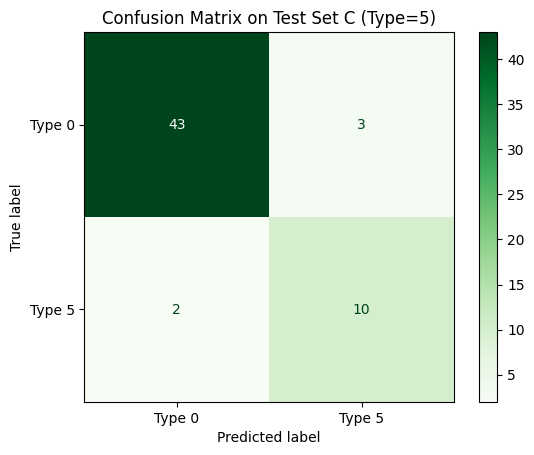

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib  # 加载模型与归一化器

# --------------------------------
# 📂 1. 加载测试集 C（Data_Set_C_sorted.csv）
# --------------------------------
df_test = pd.read_csv("Data_Set_C_sorted.csv")
X_test = df_test.drop(columns=["Type"])  # 假设测试集包含 "Type" 列
y_test = (df_test["Type"] == 5).astype(int)  # 将 Type=5 转为二分类目标

# --------------------------------
# ✅ 2. 加载预训练模型和归一化器
# --------------------------------
scaler = joblib.load("minmax_scaler.pkl")  # 归一化器
model = joblib.load("best_model_smote.pkl")  # 预训练模型

# --------------------------------
# 🔄 3. 归一化测试集（使用训练集同一个 scaler）
# --------------------------------
X_test_scaled = scaler.transform(X_test)

# --------------------------------
# 📈 4. 进行预测（只 predict，不 fit）
# --------------------------------
y_pred = model.predict(X_test_scaled)

f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("✅ Accuracy on Test Set C (Type=5):", round(acc, 4))
print("✅ F1-score on Test Set C (Type=5):", round(f1, 4))

# --------------------------------
# 📊 5. 混淆矩阵可视化
# --------------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Type 0", "Type 5"])
disp.plot(cmap='Greens')
plt.title("Confusion Matrix on Test Set C (Type=5)")
plt.grid(False)
plt.show()

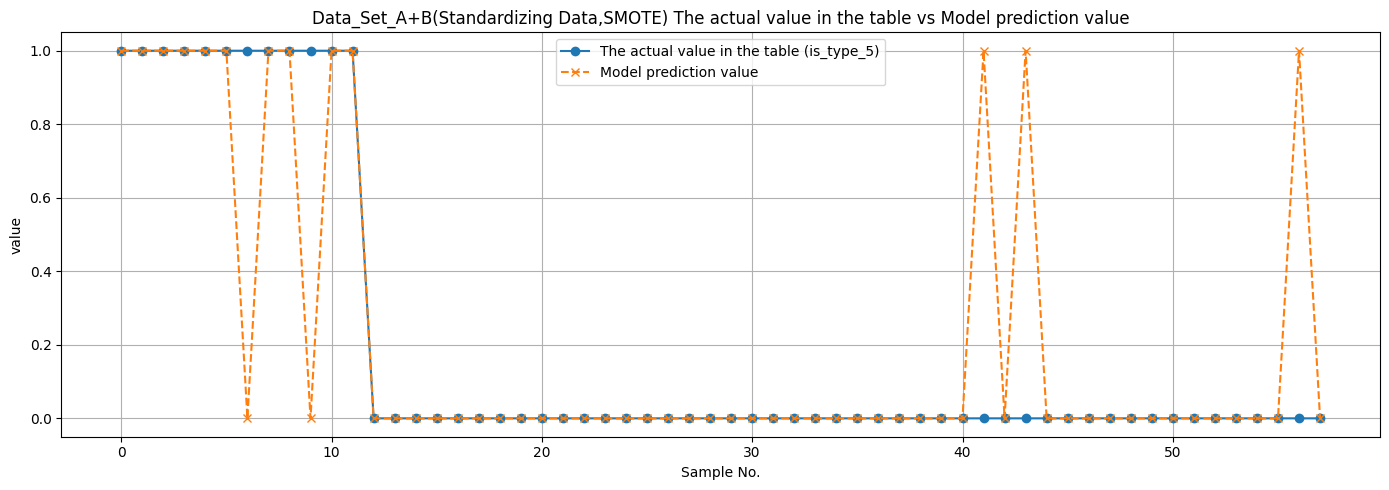

In [ ]:

N = len(y_test)

# 创建比较图
plt.figure(figsize=(14, 5))
plt.plot(np.arange(N), y_test[:N], label='The actual value in the table (is_type_5)', marker='o')
plt.plot(np.arange(N), y_pred[:N], label='Model prediction value', marker='x', linestyle='--')
plt.title('Data_Set_C(Standardizing Data,SMOTE) The actual value in the table vs Model prediction value')
plt.xlabel('Sample No.')
plt.ylabel('value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()